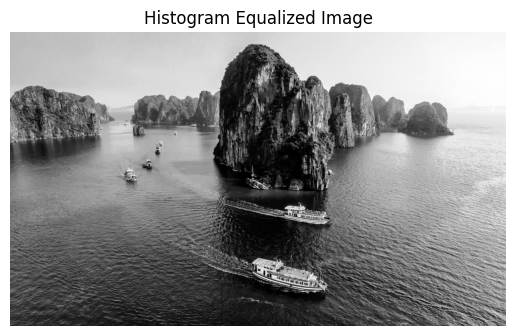

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mở ảnh và chuyển sang grayscale
img = Image.open('quang_ninh.jpg').convert('L')

# Chuyển ảnh sang mảng numpy
im1 = np.asarray(img)

# Chuyển mảng 2D sang 1D
b1 = im1.flatten()

# Tính histogram và các bin
hist, bins = np.histogram(im1, 256, [0, 255])

# Tính hàm phân phối tích lũy (CDF)
cdf = hist.cumsum()

# Bỏ qua các giá trị 0 trong CDF để tránh chia cho 0
cdf_m = np.ma.masked_equal(cdf, 0)

# Chuẩn hóa CDF để biến đổi giá trị ảnh
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = cdf_m.max() - cdf_m.min()
cdf_m = num_cdf_m / den_cdf_m

# Điền giá trị 0 cho các phần tử bị mask và ép kiểu về uint8
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Gán giá trị CDF mới cho ảnh 1D
im2 = cdf[b1]

# Chuyển ảnh 1D thành 2D với kích thước ảnh ban đầu
im3 = np.reshape(im2, im1.shape)

# Tạo ảnh mới từ mảng đã biến đổi
im4 = Image.fromarray(im3)

# Hiển thị ảnh gốc và ảnh đã cân bằng histogram
img.show()
d = Image.fromarray(im3)
d.show()

plt.imshow(im4, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()
